# Inferência Bayesiana

### Definição de Probabilidade

Seja A um evento no espaço amostral S, definimos $P(A)$ como a probabilidade de A. O valor deve satisfazer os seguintes axiomas:

1) Uma probabilidade deve estar entre os valores 0 e 1

$0\leq P(A)\leq 1$
      
2) A probabilidade do espaço amostral é 1

$P(S)=1$
         
3) Para cada sequencia de eventos mutuamente disjuntos(ou exclusivos) $A_{1},A_{2},...$($A_{i}\cap A_{j}=\phi$ para $i\neq j$)

#### Interpretações de Probabilidade

A estatística frequentista define probabilidade como a frequência relativa de ocorrência de um evento, dividido pelo número total de eventos.

$P=\lim_{N\to \infty }\frac{N_{a}}{N}$

$P(A)$ é a frequência limite do evento A.

A inferência estatística é a ferramenta que nos permite tirar "conclusões" sobre uma populaçāo, a partir de uma amostra retirada desta populaçāo. Esse tipo de inferência é baseada no conceito de sempre repetir o mesmo experimento, mantendo as mesmas condições. Se temos um modelo estatístico, podemos realizar testes de hipóteses sobre os parâmetros, considerando a variabilidade inerente a amostra observada. 

A estatística bayesiana define probabilidade como o grau de confiança que temos acerca da ocorrência de um evento. Em outras palavras, probabilidade do ponto de vista bayesiano, é a expressão de incerteza sobre algo. 

A distribuiçāo dos parâmetros é atribuída antes de se observar a amostra. É chamada de distribuiçāo a **priori**. Toda a informaçāo contida na amostra é representada pela funçāo de **verossimilhança**. A distribuiçāo dos parâmetros é atualizada após a observaçāo dos dados. Essa distribuiçāo é chamada de distribuiçāo a **posteriori**.

Em termos matemáticos, utilizamos o teorema de Bayes para obter a distribuiçāo do parâmetro theta condicional aos dados X.


$P(\theta |X=x)=\frac{L(\theta |x)\times P(\theta )}{P(X=x)}$


A distribuiçāo $P(\theta |X=x)$ é a distribuiçāo a posteriori de $\theta$ dado $X$, representada por $\pi (\theta |x)$, $P(\theta)$ é a distribuiçāo a priori de $\theta$, representada por $\pi(\theta)$ e $P(X=x)$ é a distribuiçāo preditiva de X, representada por $f(x)$:


$\pi (\theta |x)=\frac{L(\theta |x)\times \pi (\theta )}{f(x)}$


$\pi (\theta |x)\propto L(\theta |x)\times \pi (\theta )$


A distribuiçāo a posteriori é proporcioanal ao produto da verossimilhança cpm a distribuiçāo a priori. A verossimilhança carrega as informações da amostra, e a distribuiçāo a priori carrega a informaçāo prévia, antes dos dados. Dessa forma, a distribuiçāo a posteriori pondera as duas fontes de informações.

#### Exemplo da moeda

Como seria a atualizaçāo da distribuiçāo a posteriori após n lançamentos de uma moeda?

A contagem de caras em n lançamentos segue uma distribuiçāo Binomial, com funçāo de verossimilhança igual a:

$L(\theta|x) = \theta ^{x} (1-\theta)^{n-x}$


O parâmetro theta pode ser descrito a priori, como uma distribuiçāo de Dirichlet, dada por:


$\pi (\theta) = \theta ^{a-1} (1-\theta)^{b-1}$


Nessa distribuiçāo a priori, os valores a e b são chamados hiper-parâmetros. Fazendo os hiper-parâmetros a = b = 1, obtém-se uma distribuiçāo a priori uniforme (atribui probabilidade igual para qualquer possível valor de theta). Essa distribuiçāo representa o não conhecimento a respeito do parâmetro theta.

Se a distribuiçāo a priori é uma uniforme, a distribuiçāo a posteriori após observar cara será:


$\pi(\theta|x_{1}=1)\propto \theta_{0}(1-\theta)^{0}\cdot\theta^{1}(1-\theta)^{0}=\theta^{1}(1-\theta)^{0}=\theta$ 


E a distribuiçāo a posteriori após observar coroa será:


$\pi(\theta|x_{1}=0)\propto \theta_{0}(1-\theta)^{0}\cdot\theta^{1}(1-\theta)^{0}=\theta^{1}(1-\theta)^{0}=1-\theta$ 




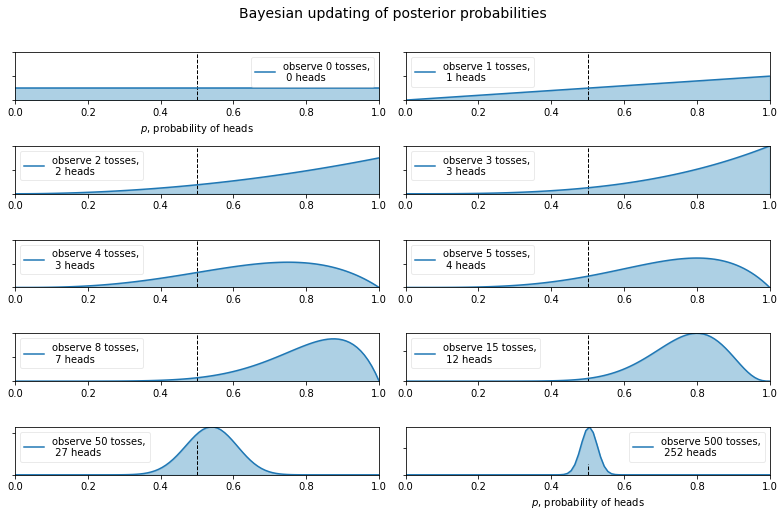

In [1]:
#Todos os exemplos mostrados aqui foram retirados/adaptados de 
# https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers

%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
figsize(11, 7)
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats

dist = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 100)

# For the already prepared, I'm using Binomial's conj. prior.
for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials)/2, 2, k+1)
    plt.xlabel("$p$, probability of heads") \
        if k in [0, len(n_trials)-1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)

plt.tight_layout()

É possivel observar que quanto mais observações nós temos(lançamento da moeda), mais próximo chegamos do valor real de p = 0,5 (representado pela linha tracejada).

As distribuições a posteriori, conforme incrementamos mais observações, sāo mostradas abaixo. A incerteza acerca do parâmetro observado é proporcional a largura da curva.

## Qual a utilidade de usar a abordagem bayesiana?

A abordagem bayesiana pode ser muito util quando queremos resolver problemas inversos. Um problema é considerado inverso, quando relacionamos os parâmetros do modelo com os dados que observamos. Em outras palavras, são problemas que envolvem a determinaçāo de uma **causa** (desconhecida) a partir de um **efeito** (dado).



### Teste A/B Bayesiano

### Exemplo 1

O departamento de marketing esta testando 2 sites e gostaria de saber qual site, A ou B, tem a maior probabilidade de conversão. O site A foi visitado por 1500 pessoas, e 75 pessoas fizeram uma compra. A frequencia observada do site A foi de 0,05. Já o site B foi visitado por 750 pessoas, e 30 pessoas fizeram uma compra. A frequencia observada do site B foi de 0,04.

Para responder essa questão, os estatísticos da empresa decidiram utilizar uma abordagem bayesiana. Para representar o experimento, adotou-se a distribuiçāo binomial. 

A distribuiçāo Binomial é a distribuição de probabilidade discreta do número de sucessos numa sequência de n tentativas, tais que, cada tentativa tem exclusivamente como resultado duas possibilidades, sucesso ou fracasso. Dessa forma, teríamos:

- para o site A, de 1500 tentativas, obtivemos 75 sucessos;
- para o site B, de 750 tentativas, obtivemos 30 sucessos;

Usando uma distribuiçāo $Beta(\alpha_{0},\beta_{0})$ como priori, sendo $\alpha_{0}=1$ e $\beta_{0}=1$ (o que seria identico a uma distribuiçāo uniforme entre [0,1]. A escolha da priori igual a beta é devido ao fato de que as distribuições beta e binomial são conjugadas, ou seja, sabemos que a distribuiçāo a posteriori será uma distribuiçāo $Beta(\alpha_{0}+X,\beta_{0}+N-X)$.


In [2]:
visitors_A = 1500
visitors_B = 750

conversions_A = 75
conversions_B = 30

In [3]:
from scipy.stats import beta

alpha_prior = 1
beta_prior = 1

posterior_A = beta(alpha_prior + conversions_A, beta_prior + visitors_A - conversions_A)
posterior_B = beta(alpha_prior + conversions_B, beta_prior + visitors_B - conversions_B)

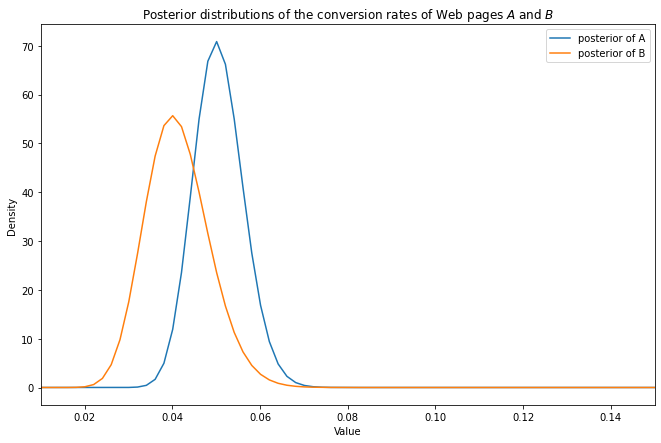

In [5]:
x = np.linspace(0,1,500)
plt.plot(x,posterior_A.pdf(x),label='posterior of A')
plt.plot(x,posterior_B.pdf(x),label='posterior of B')
plt.xlim(0.01,0.15)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Posterior distributions of the conversion rates of Web pages $A$ and $B$')
plt.legend()

In [4]:
samples = 50000

samples_posterior_A = posterior_A.rvs(samples)
samples_posterior_B = posterior_B.rvs(samples)

print((samples_posterior_A > samples_posterior_B).mean())

0.84734


Podemos dizer que o site A tem aproximadamente 85% de chance de converter melhor que o site B.

E se não tivermos distribuições conjugadas? 

<img src="images/minha_imagem.jpg" width="800px">

### Exemplo 2

Vamos considerar o exemplo anterior, porém dessa vez vamos representar a priori como uma uniforme entre [0,1], e o experimento como uma distribuiçāo de bernoulli. Como essas distribuições não são conjugadas, precisaremos aproximar a distribuiçāo a posteriori usando a simulaçāo de Monte Carlo via Cadeias de Markov (MCMC).

Existe uma biblioteca do python chamada **pymc3** desenvolvida para modelagem bayesiana, que faz a simulaçāo de Monte Carlo via Cadeias de Markov. Neste exemplo, precisaremos usar essa biblioteca para aproximar nossa posteriori.


In [6]:
!pip install pymc3 -q

In [7]:
import pymc3 as pm
figsize(12, 4)

#these two quantities are unknown to us.
true_p_A = 0.05
true_p_B = 0.04

#notice the unequal sample sizes -- no problem in Bayesian analysis.
N_A = 1500
N_B = 750

#generate some observations
observations_A = stats.bernoulli.rvs(true_p_A, size=N_A)
observations_B = stats.bernoulli.rvs(true_p_B, size=N_B)

In [8]:
print(np.mean(observations_A))
print(np.mean(observations_B))

0.046
0.032


In [9]:
# Set up the pymc3 model. Again assume Uniform priors for p_A and p_B.
with pm.Model() as model:
    p_A = pm.Uniform("p_A", 0, 1)
    p_B = pm.Uniform("p_B", 0, 1)
    
    # Define the deterministic delta function. This is our unknown of interest.
    delta = pm.Deterministic("delta", p_A - p_B)

    
    # Set of observations, in this case we have two observation datasets.
    obs_A = pm.Bernoulli("obs_A", p_A, observed=observations_A)
    obs_B = pm.Bernoulli("obs_B", p_B, observed=observations_B)

    step = pm.Metropolis()
    trace = pm.sample(50000, step=step)
    burned_trace=trace[1000:]

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [p_B]
>Metropolis: [p_A]


Sampling 4 chains for 1_000 tune and 50_000 draw iterations (4_000 + 200_000 draws total) took 25 seconds.
The number of effective samples is smaller than 25% for some parameters.


In [10]:
p_A_samples = burned_trace["p_A"]
p_B_samples = burned_trace["p_B"]
delta_samples = burned_trace["delta"]

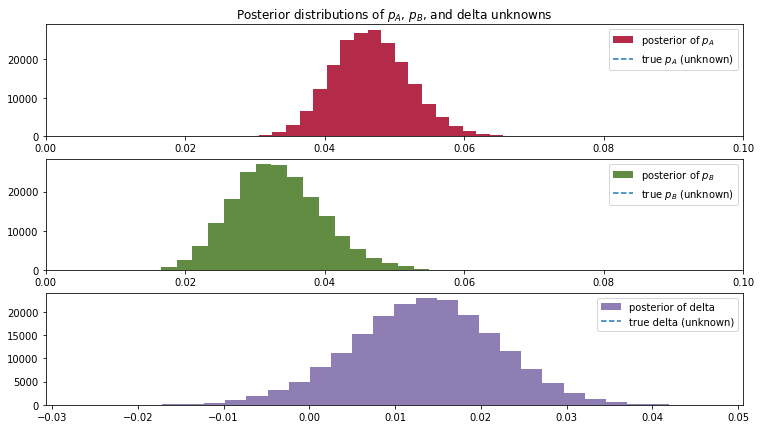

In [14]:
figsize(12.5, 7)

#histogram of posteriors

ax = plt.subplot(311)

plt.xlim(0, .1)
plt.hist(p_A_samples, histtype='stepfilled', bins=25, alpha=0.85,
         label="posterior of $p_A$", color="#A60628")
plt.vlines(true_p_A, 0, 80, linestyle="--", label="true $p_A$ (unknown)")
plt.legend(loc="upper right")
plt.title("Posterior distributions of $p_A$, $p_B$, and delta unknowns")

ax = plt.subplot(312)

plt.xlim(0, .1)
plt.hist(p_B_samples, histtype='stepfilled', bins=25, alpha=0.85,
         label="posterior of $p_B$", color="#467821")
plt.vlines(true_p_B, 0, 80, linestyle="--", label="true $p_B$ (unknown)")
plt.legend(loc="upper right")

ax = plt.subplot(313)
plt.hist(delta_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of delta", color="#7A68A6")
plt.vlines(true_p_A - true_p_B, 0, 60, linestyle="--",
           label="true delta (unknown)")
plt.vlines(0, 0, 60, color="black", alpha=0.2)
plt.legend(loc="upper right");

In [12]:
# Count the number of samples less than 0, i.e. the area under the curve
# before 0, represent the probability that site A is worse than site B.
print("Probability site A is WORSE than site B: %.3f" % \
    np.mean(delta_samples < 0))

print("Probability site A is BETTER than site B: %.3f" % \
    np.mean(delta_samples > 0))

Probability site A is WORSE than site B: 0.060
Probability site A is BETTER than site B: 0.940


# Conclusão